In [1]:
import matplotlib.pyplot as plt
import numpy as np
import rasterio
import pandas as pd
from scipy.interpolate import interp1d

In [2]:
from landslide_retrogression import landslide_retrogression_2d, landslide_retrogression_3d, save_results

In [3]:
from matplotlib.colors import ListedColormap

cmap = ListedColormap(['white', 'red'])

## Test in profiles (2d)

these tests are just for understanding the concept of how to calculate the terrain criteria using an iterative approach. Probably not the best code.

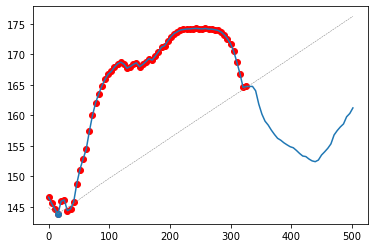

In [4]:
prof = pd.read_csv("test_data/profile.txt", sep="\t", header=None).to_numpy()
landslide_retrogression_2d(prof,3,res=5)

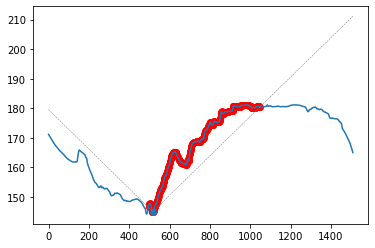

In [5]:
prof = pd.read_csv("test_data/profile2.txt", sep="\t", header=None).to_numpy()
landslide_retrogression_2d(prof,355,res=5)

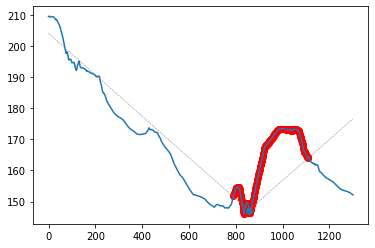

In [6]:
prof = pd.read_csv("test_data/profile3.txt", sep="\t", header=None).to_numpy()
f_x = interp1d(prof[:,0], prof[:,1], bounds_error=False)
x_2 = np.linspace(0,1300,1300)
y_2 = f_x(x_2)
prof = np.c_[x_2,y_2]

landslide_retrogression_2d(prof,855,res=1, tol=0)

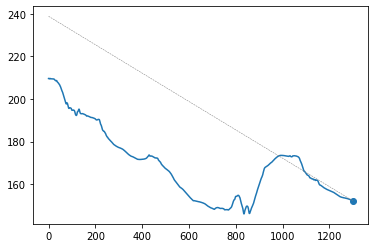

In [7]:
landslide_retrogression_2d(prof,-1,res=1, tol=5)

## Test in dem rasters (3D)

In [8]:
with rasterio.open("test_data/gjerdrum_dem.tif") as src:
    dem_test = src.read(1)
    transform = src.transform
    profile = src.profile
with rasterio.open("test_data/release.tif") as src_rel:
    rel = src_rel.read(1)

release_result = landslide_retrogression_3d(dem_test, rel, transform, verbose=False, min_slope=1 / 15)

save_results(release_result, profile, "test_data/test_release_result.tif")

runing landslide propagation...
break at 144
total time = 23.289980999999997


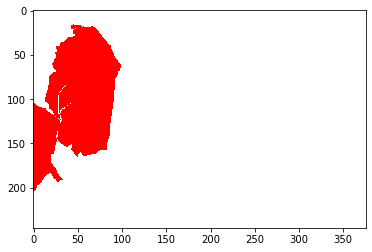

In [9]:
plt.imshow(release_result, cmap=cmap)